In [1]:
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
import os

import random

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# Paths
training_data_path = "2D_LSTM_results/LSTM_trainingData_Gadi.txt"
testing_data1_path = "2D_LSTM_results/LSTM_testingData_Gadi_1.txt"
testing_data2_path = "2D_LSTM_results/LSTM_testingData_Gadi_2.txt"

testing_best_evolution_path = "2D_LSTM_results/LSTM_best_evolution.npy"
testing_worst_evolution_path = "2D_LSTM_results/LSTM_worst_evolution.npy"

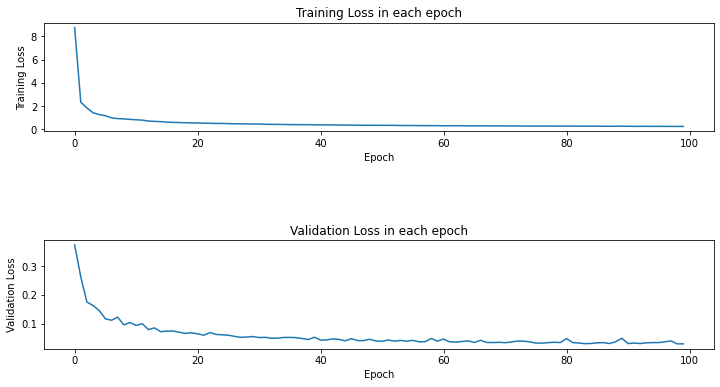

In [3]:
file1 = open(training_data_path, 'r')
Lines = file1.readlines()

training_data_list = []
for line in Lines:
    training_data_list.append([float(x) for x in line.strip().split('/')])
    
# Plot the Training loss and validation loss during training
plt.figure(figsize=(12, 6))
    
plt.subplot(2, 1, 1)
plt.plot(training_data_list[0])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss in each epoch')

plt.subplot(2, 1, 2)
plt.plot(training_data_list[1])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss in each epoch')
    
plt.subplots_adjust(hspace=1)
    
plt.show()

In [4]:
file1 = open(testing_data1_path, 'r')
Lines = file1.readlines()

testing_data_list1 = []
for line in Lines:
    testing_data_list1.append(line)
    
print("Total loss for the model on test set is",testing_data_list1[0])

Total loss for the model on test set is 0.030305892665637657



In [5]:
file2 = open(testing_data2_path, 'r')
Lines = file2.readlines()

best_worst_error_list = [float(x) for x in Lines[0].strip().split('/')]
best_worst_output_list = [np.asarray([float(y) for y in x.split('|')]).reshape(201,401) for x in Lines[1].strip().split('/')]
best_worst_ConvAE_list = [np.asarray([float(y) for y in x.split('|')]).reshape(201,401) for x in Lines[2].strip().split('/')]
best_worst_predicted_list = [np.asarray([float(y) for y in x.split('|')]).reshape(201,401) for x in Lines[3].strip().split('/')]

Best model has a error of  3.1826300983084366e-05


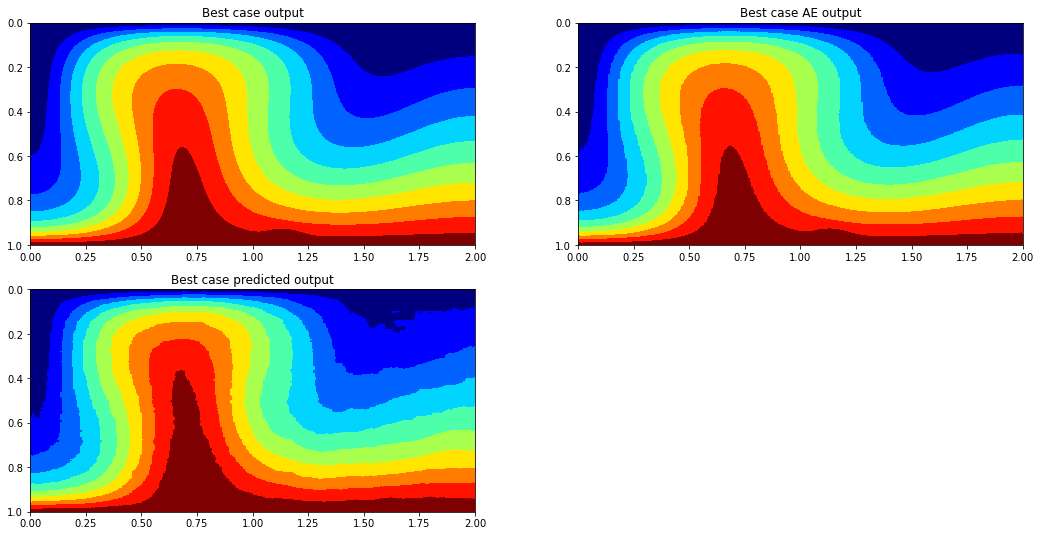

Worst model has a error of  0.0078326016664505


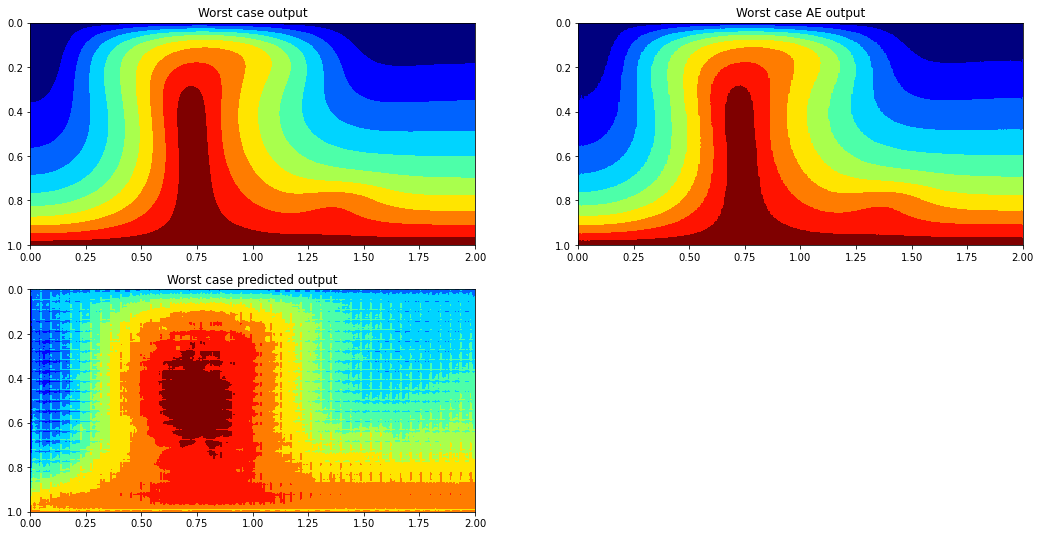

In [6]:
# Draw some plots for the best and the worst error
print("Best model has a error of ", best_worst_error_list[0])
    
    
plt.figure(figsize=(18, 9))
    
plt.subplot(2,2,1)
plt.title("Best case output")
plt.imshow(best_worst_output_list[0],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,2)
plt.title("Best case AE output")
plt.imshow(best_worst_ConvAE_list[0],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,3)
plt.title("Best case predicted output")
plt.imshow(best_worst_predicted_list[0],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
plt.show()
    
    
print("Worst model has a error of ", best_worst_error_list[1])
    
    
    
plt.figure(figsize=(18, 9))
    
plt.subplot(2,2,1)
plt.title("Worst case output")
plt.imshow(best_worst_output_list[1],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,2)
    
plt.title("Worst case AE output")
plt.imshow(best_worst_ConvAE_list[1],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
    
plt.subplot(2,2,3)
    
plt.title("Worst case predicted output")
plt.imshow(best_worst_predicted_list[1],
            cmap=cm.get_cmap('jet', 10),
            extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
    
plt.show()

In [7]:
best_evolution = np.load(testing_best_evolution_path)
worst_evolution = np.load(testing_worst_evolution_path)

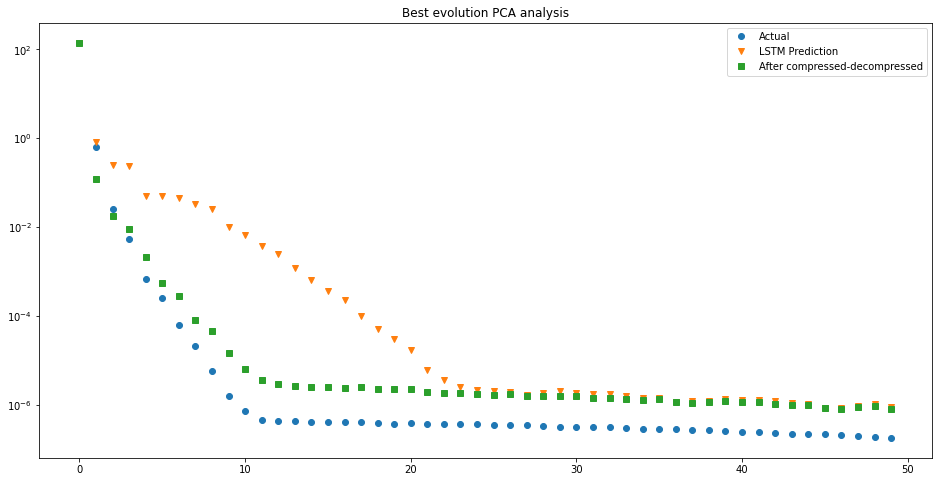

In [8]:
def SVD(X):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) 
    return U, Sigma, VT

_, S_original_best, _ = SVD(np.transpose(np.asarray(best_evolution[0]),(1,2,0)))
_, S_predicted_best, _ = SVD(np.transpose(np.asarray(best_evolution[1]),(1,2,0)))
_, S_ConvAE_best, _ = SVD(np.transpose(np.asarray(best_evolution[2]),(1,2,0)))

plt.figure(figsize=(16,8))
plt.title("Best evolution PCA analysis")
plt.plot(S_original_best.diagonal(),'o',label="Actual")
plt.plot(S_predicted_best.diagonal(),'v',label="LSTM Prediction")
plt.plot(S_ConvAE_best.diagonal(),'s',label="After compressed-decompressed")
plt.legend()
plt.yscale("log")
plt.show()

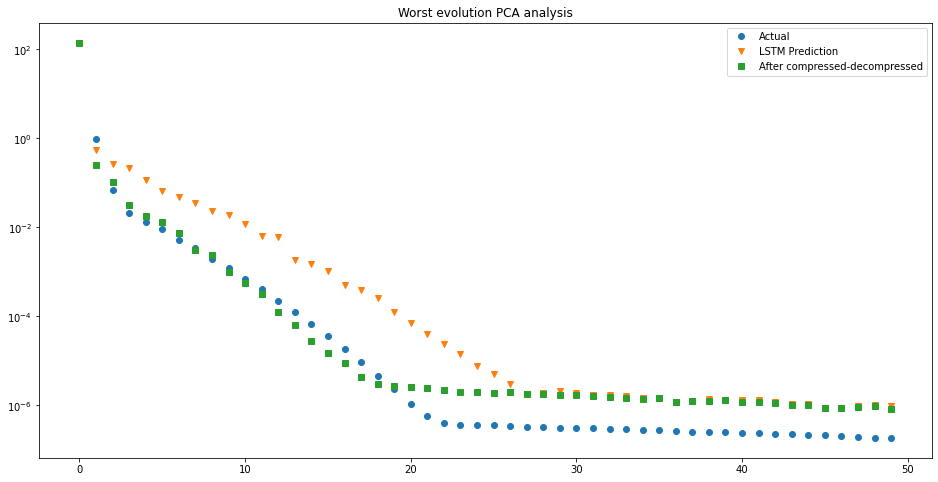

In [9]:
_, S_original_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[0]),(1,2,0)))
_, S_predicted_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[1]),(1,2,0)))
_, S_ConvAE_worst, _ = SVD(np.transpose(np.asarray(worst_evolution[2]),(1,2,0)))

plt.figure(figsize=(16,8))
plt.title("Worst evolution PCA analysis")
plt.plot(S_original_worst.diagonal(),'o',label="Actual")
plt.plot(S_predicted_worst.diagonal(),'v',label="LSTM Prediction")
plt.plot(S_ConvAE_worst.diagonal(),'s',label="After compressed-decompressed")
plt.legend()
plt.yscale("log")
plt.show()

In [10]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Display animations for temperature fields in different timestamps
fig = plt.figure(figsize=(12, 12))

plt.subplot(2,1,1)
plt.title("Best Actual Temperature fields animation")
plot1= plt.imshow(best_evolution[0][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(2,1,2)
plt.title("Best Predicted Temperature fields animation")
plot2= plt.imshow(best_evolution[1][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

    
def animate(i):
    plot1.set_data(best_evolution[0][i])
    plot2.set_data(best_evolution[1][i])
    return [plot1,plot2]

anim = FuncAnimation(fig, animate, frames=50, interval=100, blit=True)
anim.save('actual_and_Predictions_Best_LSTM.gif')
plt.close()
HTML(anim.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.


In [11]:
# Display animations for temperature fields in different timestamps
fig = plt.figure(figsize=(12, 12))

plt.subplot(2,1,1)
plt.title("Worst Actual Temperature fields animation")
plot1= plt.imshow(worst_evolution[0][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])


plt.subplot(2,1,2)
plt.title("Worst Predicted Temperature fields animation")
plot2= plt.imshow(worst_evolution[1][0],
                 cmap=cm.get_cmap('jet', 10),
                 extent=(0, 2, 0, 1))

ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

    
def animate(i):
    plot1.set_data(worst_evolution[0][i])
    plot2.set_data(worst_evolution[1][i])
    return [plot1,plot2]

anim = FuncAnimation(fig, animate, frames=50, interval=100, blit=True)
anim.save('actual_and_Predictions_Worst_LSTM.gif')
plt.close()
HTML(anim.to_jshtml())

MovieWriter ffmpeg unavailable; using Pillow instead.
